In [1]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

In [2]:
# Load datasets
aapl_market = pd.read_hdf('data.hdf5', key='AAPL_O_2019_market').dropna()
amzn_market = pd.read_hdf('data.hdf5', key='AMZN_O_2019_market').dropna()

aapl_market

,HIGH,LOW,OPEN,CLOSE,COUNT,VOLUME,SMA_10M,SMA_30M,SMA_1H,SMA_2H
Date,,,,,,,,,,
2019-01-02 11:00:00,154.60,154.46,154.50,154.60,4.0,268.0,154.431,154.440667,154.502500,154.422250
2019-01-02 11:01:00,154.58,154.58,154.58,154.58,1.0,350.0,154.454,154.443000,154.503833,154.423750
2019-01-02 11:02:00,154.36,154.35,154.36,154.35,2.0,212.0,154.455,154.438000,154.501500,154.426750
2019-01-02 11:03:00,154.35,154.35,154.35,154.35,4.0,786.0,154.455,154.432667,154.499000,154.429667
2019-01-02 11:04:00,154.35,154.31,154.35,154.31,8.0,454.0,154.440,154.424667,154.496500,154.432500
...,...,...,...,...,...,...,...,...,...,...
2019-09-19 23:56:00,221.27,221.15,221.27,221.20,4.0,320.0,221.180,221.175000,221.123167,221.075500
2019-09-19 23:57:00,221.10,221.10,221.10,221.10,1.0,47.0,221.169,221.177333,221.122833,221.076333
2019-09-19 23:58:00,221.10,221.08,221.10,221.08,6.0,713.0,221.158,221.180000,221.122500,221.077667


In [3]:
from sklearn.preprocessing import MinMaxScaler
#LSTM building step
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

def get_train_test_split(df: pd.DataFrame, test_split: float=0.2) -> (np.array, np.array, np.array, np.array):
    # data splitting
    #Feature Scaling

    sc = MinMaxScaler(feature_range = (0, 1))
    
    split = int(len(df) * (1 - test_split))
    dataset = sc.fit_transform(df.loc[:, 'OPEN'].values.reshape(-1, 1))

    training_set_scaled = dataset[:split]
    testing_set_scaled = dataset[split:]
    display(len(training_set_scaled), len(testing_set_scaled))
    
    X_train = []
    y_train = []
    
    X_test = []
    y_test = []


    #In future it might be more suitable to scale by windows
    try:
        for i in range(61, len(training_set_scaled)):
            X_train.append(training_set_scaled[i-60:i, 0])
            y_train.append(training_set_scaled[i, 0])

    except ValueError as e:
        print(e.args)
    
    X_train, y_train = np.array(X_train), np.array(y_train)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        
    try:
        for i in range(61, len(testing_set_scaled)): # -3000
            X_test.append(testing_set_scaled[i-60:i, 0])
            y_test.append(testing_set_scaled[i, 0])

    except ValueError as e:
        print(e.args)
    
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1, 1)

    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    return X_train, X_test, y_train, y_test, sc


In [4]:
X_train, X_test, y_train, y_test, sc = get_train_test_split(aapl_market, 0.2)

121566

30392

In [5]:
# # Here we have hidden layers with 50 units each
# regressor = Sequential()

# regressor.add(CuDNNLSTM(units = 20, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.15))

# regressor.add(CuDNNLSTM(units = 20, return_sequences = True))
# regressor.add(Dropout(0.15))

# regressor.add(CuDNNLSTM(units = 20, return_sequences = True))
# regressor.add(Dropout(0.15))

# regressor.add(CuDNNLSTM(units = 20))
# regressor.add(Dropout(0.15))

# regressor.add(Dense(units = 1))

# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
# regressor.fit(X_train, y_train, epochs = 100, batch_size = 3600, callbacks=[cb])
# regressor.save('regressor.h5')

In [ ]:
# X_train, X_test, y_train, y_test, sc = get_train_test_split(amzn_market, 0.2)
# display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# # display(X_train, X_test, y_train, y_test)

In [6]:
regressor = tf.keras.models.load_model('regressor.h5')
display(regressor.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_24 (CuDNNLSTM)    (None, 60, 20)            1840      
_________________________________________________________________
dropout_24 (Dropout)         (None, 60, 20)            0         
_________________________________________________________________
cu_dnnlstm_25 (CuDNNLSTM)    (None, 60, 20)            3360      
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 20)            0         
_________________________________________________________________
cu_dnnlstm_26 (CuDNNLSTM)    (None, 60, 20)            3360      
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 20)            0         
_________________________________________________________________
cu_dnnlstm_27 (CuDNNLSTM)    (None, 20)               

None

In [9]:
y_pred

array([[0.8802105 ],
       [0.880249  ],
       [0.88028336],
       ...,
       [0.9208101 ],
       [0.92083   ],
       [0.9208461 ]], dtype=float32)

In [7]:
y_pred = regressor.predict(X_test, batch_size=3600)
mse = np.sum((y_pred - y_test) ** 2) / len(y_pred)
print(f'mse: {mse}')

mse: 0.0002675586835032083


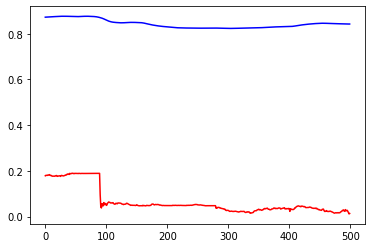

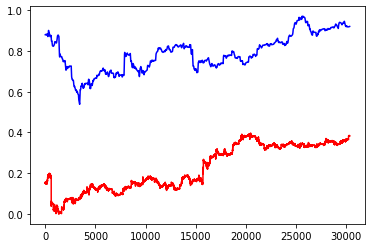

In [10]:
def plot_pred_ts(y_pred, y_true, sc: MinMaxScaler=None, start=None, end=None):
    if sc is not None:
        if len(y_pred.shape) < 2:
            y_pred = np.reshape(y_pred, (-1, 1))
#         y_pred = sc.inverse_transform(y_pred)
        if len(y_true.shape) < 2:
            y_true = np.reshape(y_true, (-1 ,1))
#         y_true = sc.inverse_transform(y_true)

    plt.plot(y_true[start:end], color = 'red', label = 'y_true')
    plt.plot(y_pred[start:end], color = 'blue', label = 'y_pred')
    plt.show()

plot_pred_ts(y_pred=y_pred, y_true=y_train, sc=sc, start=500, end=1000)
plot_pred_ts(y_pred=y_pred, y_true=y_train, sc=sc, start=0, end=len(y_pred))

In [ ]:
# # Here we have hidden layers with 50 units each
# regressor = Sequential()

# regressor.add(LSTM(units = 20, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.15))

# regressor.add(LSTM(units = 20, return_sequences = True))
# regressor.add(Dropout(0.15))

# regressor.add(LSTM(units = 20, return_sequences = True))
# regressor.add(Dropout(0.15))

# regressor.add(LSTM(units = 20))
# regressor.add(Dropout(0.15))

# regressor.add(Dense(units = 1))

# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# regressor.fit(X_train, y_train, epochs = 12, batch_size = 3600)
# regressor.save('regressor.h5')

In [ ]:
plt.plot(y_test, color = 'red', label = 'y_test')
plt.plot(y_pred, color = 'blue', label = 'y_pred')
plt.show()

In [ ]:
# import tensorflow as tf
# load_model = tf.keras.models.load_model('regressor.h5')
# load_model.summary()

In [ ]:
# plt.plot(y_test[:500], color = 'red', label = 'y_test')
# plt.plot(y_pred[:500], color = 'blue', label = 'y_pred')
# plt.show()

In [ ]:
# # mse 
# np.sum((y_test - y_pred) ** 2) / len(y_test)

In [ ]:
# # Step to plot the data
# plt.figure(figsize = (30,15))
# plt.plot(y_test, color = 'red', label = 'y_test')
# plt.plot(y_pred, color = 'blue', label = 'y_pred')
# plt.title('Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

# # plt.plot(truncated_df.index, truncated_df['OPEN'], label='truncated')
# # plt.plot(aapl_2019_market_df.index, aapl_2019_market_df['OPEN'], label='original')

# # plt.legend()
# plt.show()